In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 

  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path) #datasets/housing/housing.tgz
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv") #csv_path="datasets/housing/housing.csv"
  return pd.read_csv(csv_path)
fetch_housing_data()
housing = load_housing_data()

C:\Users\BATU\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


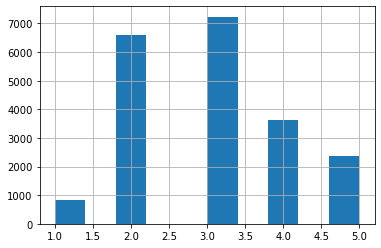

In [2]:
def split_train_test(data, test_ratio):
  np.random.seed(0)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


housing["income"] = pd.cut(housing["median_income"],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=[1, 2, 3, 4, 5])
housing["income"].hist() #Series object

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income"]):
  strat_train_set = housing.iloc[train_index]
  strat_test_set = housing.iloc[test_index]
    
for set_ in (strat_train_set, strat_test_set): #removing income attribute from train and test data frames
  set_.drop("income", axis=1, inplace=True)

#strat_train_set.head()
#strat_test_set.info()

In [3]:
def adding_new_features_into_sets(): #implement method for adding new features into train and test sets
 strat_train_set["rooms_per_household"] = housing["total_rooms"]/housing["households"]
 strat_train_set["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
 strat_train_set["population_per_household"]=housing["population"]/housing["households"]
 strat_test_set["rooms_per_household"] = housing["total_rooms"]/housing["households"]
 strat_test_set["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
 strat_test_set["population_per_household"]=housing["population"]/housing["households"]
 return strat_train_set, strat_test_set

train_set, test_set = adding_new_features_into_sets() # implementation part
#train_set.head()  #to see exapmles with head method 
#test_set.head()   #to see exapmles with head method 

<ipython-input-3-5cb889103522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set["rooms_per_household"] = housing["total_rooms"]/housing["households"]
<ipython-input-3-5cb889103522>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
<ipython-input-3-5cb889103522>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [5]:
def seperate_targets(train_set,test_set):
 housing = train_set.drop("median_house_value", axis=1)
 housing_labels = train_set["median_house_value"].copy()
 housing_test = test_set.drop("median_house_value", axis=1)
 housing_labels_test = test_set["median_house_value"].copy()
 return housing,housing_labels,housing_test,housing_labels_test

In [6]:
housing, housing_labels, housing_test,housing_labels_test=seperate_targets(train_set,test_set)

In [7]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4079 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   ocean_proximity           4128 non-null   object 
 9   rooms_per_household       4128 non-null   float64
 10  bedrooms_per_room         4079 non-null   float64
 11  population_per_household  4128 non-null   float64
dtypes: float64(11), object(1)
memory usage: 419.2+ KB


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_cat = housing[["ocean_proximity"]]#housing cat, you will be using this in below parts `become train set`
housing_cat.head(10)
###########################
imputer_test = SimpleImputer(strategy="median")
housing_num_test = test_set.drop("ocean_proximity", axis=1)
imputer.fit(housing_num_test)
imputer.statistics_
housing_num_test.median().values
Y = imputer.transform(housing_num_test)
housing_tr_test = pd.DataFrame(Y, columns=housing_num_test.columns)#housing cat_test, you will be using this in below parts or you can make transform it, not sure
housing_cat_test = test_set[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
ordinal_encoder.categories_
##### for the test #####
ordinal_encoder_test = OrdinalEncoder()
housing_cat_encoded_test = ordinal_encoder_test.fit_transform(housing_cat_test)
housing_cat_encoded_test[:10]
ordinal_encoder_test.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [10]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()
### for the test###
cat_encoder_test = OneHotEncoder()
housing_cat_1hot_test = cat_encoder_test.fit_transform(housing_cat_test)
housing_cat_1hot_test.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('attribs_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),
        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [13]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#print(num_attribs)

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
             #("cat", 'passthrough', cat_attribs),
         ],
            #remainder = 'drop'
            #remainder = 'passthrogh'
            #remainder = OneHotEncoder(),
         )

housing_prepared = full_pipeline.fit_transform(housing)


In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
#print("Predictions:", lin_reg.predict(some_data_prepared))
#print("Labels:", list(some_labels))

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_num_tr, housing_labels)



from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_num_tr, housing_labels)
housing_predictions = tree_reg.predict(housing_num_tr)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_num_tr, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
lin_scores = cross_val_score(lin_reg, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71441.82119163 74756.9238692  73624.31238055 72026.80373983
 76254.84957057 77061.27577946 72226.82628222 71617.00367524
 73062.58357738 74292.65267407]
Mean: 73636.50527401434
Standard deviation: 1845.901966732151
Scores: [66514.91135422 67720.57662846 68611.40553625 74947.76053801
 68596.87728798 71265.55168861 65032.77795338 68997.86983126
 71848.6609317  67936.74849588]
Mean: 69147.31402457698
Standard deviation: 2709.2784489936444


In [17]:
from sklearn.ensemble import RandomForestRegressor   #this is new and fit
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_num_tr, housing_labels)
housing_predictions = forest_reg.predict(housing_num_tr)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_scores = cross_val_score(forest_reg, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse)
display_scores(forest_rmse_scores)

19085.268258711967
Scores: [50213.12396754 48257.93163142 50108.69710004 53378.40382785
 50164.8693983  53849.72349948 49245.98419952 49416.84747145
 54149.0741697  52503.6445416 ]
Mean: 51128.82998069128
Standard deviation: 2024.9022779671432
